In [27]:
from ML_prepare import *
from Kfold_CV import *

In [2]:
df_cohorts_2 = df[df['Cohort'] == 'D1_2']
df_cohorts_2['Individual'].unique()

array([ 9, 10, 11, 12, 13, 14])

In [3]:
df_cohorts_1 = df[df['Cohort'] == 'D1_1']
df_cohorts_1['Individual'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
df_cohorts_2.iloc[:, 0:6]

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC
96,75.626667,75.070,1.052285,70.85,82.33,21932.160
97,90.656346,88.770,2.015711,81.22,104.88,27205.500
98,73.793345,74.470,0.885405,64.61,76.22,21552.095
99,75.351821,75.420,0.571224,72.53,78.52,21850.220
100,81.400240,82.190,1.442471,72.60,88.45,23684.270
...,...,...,...,...,...,...
163,73.594539,72.380,2.248610,57.43,93.53,21482.985
164,57.839897,54.130,1.916429,52.97,74.14,16825.740
165,64.237295,65.195,1.277941,58.97,72.63,18691.065
166,70.834320,70.440,0.871779,66.65,76.07,20753.005


In [5]:
df_cohorts_2['Frustrated']

96     2
97     5
98     0
99     1
100    6
      ..
163    8
164    0
165    1
166    4
167    0
Name: Frustrated, Length: 72, dtype: int64

In [6]:
df_cohorts_2['Frustrated'].to_numpy()

array([2, 5, 0, 1, 6, 1, 4, 8, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 5, 0, 0,
       1, 0, 0, 3, 1, 1, 2, 1, 1, 3, 0, 2, 4, 0, 1, 4, 0, 1, 5, 1, 1, 8,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 0, 4, 0, 1, 6, 0,
       4, 8, 0, 1, 4, 0])

In [8]:
cohort1 = log_model_f.score(df_cohorts_1.iloc[:, 0:6], df_cohorts_1['Frustrated'])
cohort2 = log_model_f.score(df_cohorts_2.iloc[:, 0:6], df_cohorts_2['Frustrated'])

In [9]:
display(cohort1, cohort2)

0.2708333333333333

0.3194444444444444

In [25]:
pred_cohort_1 = log_model_f.predict(df_cohorts_1.iloc[:, 0:6])
pred_cohort_2 = log_model_f.predict(df_cohorts_2.iloc[:, 0:6])
pred_cohort = log_model_f.predict(df.iloc[:, 0:6])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 1, 1,
       2, 4, 2, 3, 1, 1, 2, 1, 4, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2])

In [24]:
contingency_table = pd.crosstab(df['Cohort'], df['Frustrated'])
contingency_table


Frustrated,0,1,2,3,4,5,6,7,8
Cohort,,,,,,,,,
D1_1,8,18,24,13,17,11,3,2,0
D1_2,21,27,7,3,6,3,2,0,3


In [59]:
predictions = pd.DataFrame({'Predicted': pred_cohort, 'Actual': df['Frustrated']})
table1 = pd.crosstab(predictions['Predicted'], df['Cohort'])

table2 = pd.crosstab(predictions['Predicted'], predictions['Actual'])

table3 = pd.crosstab(predictions['Predicted'], [predictions['Actual'],df['Cohort']])
from sympy import *
table3

Actual       0         1         2         3         4         5         6  \
Cohort    D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1 D1_2 D1_1   
Predicted                                                                    
0            1    0    0    0    0    0    0    0    0    0    0    0    0   
1            6   19   16   20   16    4   11    3   11    4    9    2    3   
2            0    2    1    7    7    3    2    0    4    2    1    1    0   
3            0    0    0    0    1    0    0    0    0    0    1    0    0   
4            1    0    1    0    0    0    0    0    2    0    0    0    0   

Actual            7    8  
Cohort    D1_2 D1_1 D1_2  
Predicted                 
0            0    0    0  
1            2    2    2  
2            0    0    1  
3            0    0    0  
4            0    0    0

/tmp/ipykernel_280884/132812096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohorts_1['Cohort_1'] = np.where(df_cohorts_1['Frustrated'] == pred_cohort_1, 1,0)


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (2).

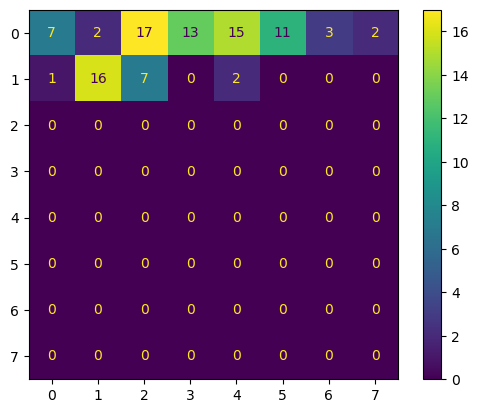

In [57]:
from sklearn import metrics

df_cohorts_1['Cohort_1'] = np.where(df_cohorts_1['Frustrated'] == pred_cohort_1, 1,0)


# Confusion matrix for cohort 1
confusion_matrix_cohort1 = metrics.confusion_matrix(df_cohorts_1['Cohort_1'], df_cohorts_1['Frustrated'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_cohort1, display_labels=['False','True'])
cm_display.plot()

# # Confusion matrix for cohort 2
# # confusion_matrix_cohort2 = metrics.confusion_matrix(df_cohorts_2['Frustrated'], pred_cohort_2)
# # cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_cohort2, display_labels=['False','True'])
# # cm_display.plot()